In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import  matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv(r'affair_data.csv')

In [3]:
dataset.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [5]:
data = dataset[dataset.columns[:-1]]

In [6]:
target = dataset['affair']

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 0)

In [9]:
model = LogisticRegression()

In [10]:
model.fit(x_train, y_train)

LogisticRegression()

In [11]:
predictions = model.predict_proba(x_test)

In [12]:
predictions

array([[0.37442487, 0.62557513],
       [0.92523133, 0.07476867],
       [0.68436963, 0.31563037],
       ...,
       [0.54059867, 0.45940133],
       [0.79790212, 0.20209788],
       [0.77284695, 0.22715305]])

In [13]:
model.score(x_train, y_train)

0.7235188509874326

In [14]:
model.score(x_test, y_test)

0.7319371727748691

In [18]:
def tpr(tp, fn):
    return tp / (tp + fn)

In [19]:
def fpr(fp, tn):
    return fp / (fp + tn)

In [20]:
tp = 0
tn = 0
fp = 0
fn = 0
for predict, target in zip(predictions[:,1], y_test):
    if predict >= 0.5:
        predict_class = 1
    else:
        predict_class = 0
    if predict_class == 1: 
        if target == 1:
            tp += 1
        else:
            fp += 1
    else:
        if target == 0:
            tn += 1
        else:
            fn += 1

In [21]:
tpr = tpr(tp, fn)
tpr

0.3723228995057661

In [22]:
fpr = fpr(fp, tn)
fpr

0.10053722179585571

In [23]:
m_minus = 0
m_plus = 0
for predict in predictions[:,1]:
    if predict >= 0.5:
        m_minus += 1
    else:
        m_plus += 1
print('m_minus:{}, m_plus:{}'.format(m_minus, m_plus))

m_minus:357, m_plus:1553


In [25]:
# Построим график ROC AUC и сравним с графиком, построенным с помощью встроенных инструментов

In [39]:
fpr = []
tpr = []
auc = 0
tp = 0
fp = 0
tn  = 0
fn = 0 
threshold = np.arange(0.0, 1.01, .01)
for i in threshold:
    for predict, target in zip(predictions[:,1], y_test):
        if predict > i:
            if target == 1:
                tp += 1
            if target == 0:
                fp += 1
        else:
            if target == 1:
                fn += 1
            if target == 0:
                tn += 1
    fpr.append(fp / (fp + tn))
    tpr.append(tp / (tp + fn))

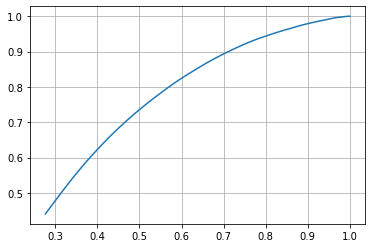

In [40]:
plt.plot( fpr, tpr )
plt.grid()

In [28]:
from sklearn.metrics import roc_curve

In [29]:
fpr2, tpr2, thres2 = roc_curve( y_test, predictions[:, 1] )

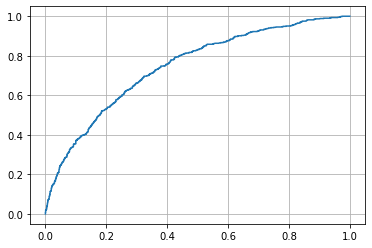

In [30]:
plt.plot( fpr2, tpr2 )
plt.grid()

In [44]:
# Рассчитаем площадь под кривой

In [45]:
auc = 0
auc_sq = []
for i in range(len(tpr)):
    auc_sq.append(auc)
    auc += tpr[i] / float(m_minus)

In [46]:
auc_sq

[0,
 0.0010948358738215183,
 0.003284507621464555,
 0.00656901524292911,
 0.010948358738215183,
 0.016422538107322776,
 0.022991553350251888,
 0.030655404467002517,
 0.039414091457574664,
 0.049265810638485924,
 0.06020515095928907,
 0.07222670136953688,
 0.08532865818574695,
 0.09950200299050722,
 0.11473050263247606,
 0.13099792396031176,
 0.14830065960704952,
 0.16662969115527732,
 0.18597058913713588,
 0.20631072776824833,
 0.22763387389727302,
 0.24992018700590346,
 0.2731516302593156,
 0.2973227926070622,
 0.3224084224803895,
 0.34838867936099105,
 0.37525093746449,
 0.4029807673230271,
 0.4315601321017783,
 0.4609583691815426,
 0.4911520306770487,
 0.5221122576525782,
 0.5538246206402716,
 0.586262064387893,
 0.6194083557441006,
 0.6532508689245177,
 0.6877751744612849,
 0.7229506097352013,
 0.7587501194940308,
 0.7951520595359844,
 0.8321456077601679,
 0.8697181383822042,
 0.9078534182507518,
 0.9465370178979513,
 0.9857472931220139,
 1.0254644034046332,
 1.0656739192779496,
 1

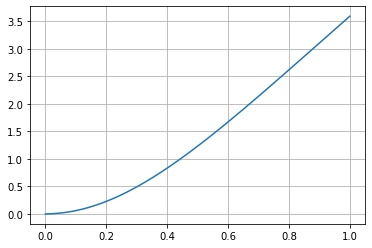

In [47]:
plt.plot( threshold, auc_sq )
plt.grid()

In [48]:
# Построим график precision - recall

In [49]:
pr = []
recall = []
tp = 0
fp = 0
fn = 0
threshold = np.arange(0.0, 1.01, .01)
for i in threshold:
    for predict, target in zip(predictions[:,1], y_test):
        if predict > i:
            if target == 1:
                tp += 1
            if target == 0:
                fp += 1
        else:
            if target == 1:
                fn += 1
    pr.append(tp / (tp + fp))
    recall.append(tp / (tp + fn))

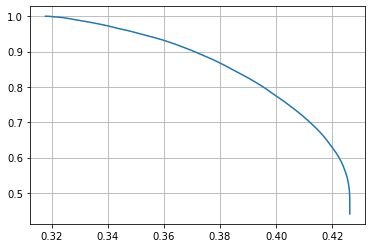

In [50]:
plt.plot( pr, recall )
plt.grid()